In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Data Preview

In [2]:
df = pd.read_csv("student_data.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Unique Values per Column

In [4]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: school
['GP' 'MS']

Column: sex
['F' 'M']

Column: age
[18 17 15 16 19 22 20 21]

Column: address
['U' 'R']

Column: famsize
['GT3' 'LE3']

Column: Pstatus
['A' 'T']

Column: Medu
[4 1 3 2 0]

Column: Fedu
[4 1 2 3 0]

Column: Mjob
['at_home' 'health' 'other' 'services' 'teacher']

Column: Fjob
['teacher' 'other' 'services' 'health' 'at_home']

Column: reason
['course' 'other' 'home' 'reputation']

Column: guardian
['mother' 'father' 'other']

Column: traveltime
[2 1 3 4]

Column: studytime
[2 3 1 4]

Column: failures
[0 3 2 1]

Column: schoolsup
['yes' 'no']

Column: famsup
['no' 'yes']

Column: paid
['no' 'yes']

Column: activities
['no' 'yes']

Column: nursery
['yes' 'no']

Column: higher
['yes' 'no']

Column: internet
['no' 'yes']

Column: romantic
['no' 'yes']

Column: famrel
[4 5 3 1 2]

Column: freetime
[3 2 4 1 5]

Column: goout
[4 3 2 1 5]

Column: Dalc
[1 2 5 3 4]

Column: Walc
[1 3 2 4 5]

Column: health
[3 5 1 2 4]

Column: absences
[ 6  4 10  2  0 16 14  7  8 25 1

### Duplicate Records

In [5]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
duplicate_rows.head()

Number of duplicate rows: 0


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


### Description of Dataset Features

The table below summarizes 34 features from the student performance dataset, covering demographics, family background, study habits, lifestyle and academic results.

| Column Name | Description |
|-------------|-------------|
| **school** | Type of school (GP - Gabriel Pereira or MS - Mousinho da Silveira) |
| **sex** | Gender of student (F - Female, M - Male) |
| **age** | Age of student (15 to 22) |
| **address** | Address of student (U - Urban, R - Rural) |
| **famsize** | Family size (LE3 - Less or equal to 3, GT3 - Greater than 3) |
| **Pstatus** | Status of Parents (T - Together, A - Apart) |
| **Medu** | Education of Mother (ranked 1 to 5 ) |
| **Fedu** | Education of Father (ranked 1 to 5 ) |
| **Mjob** | Mother's job (teacher, health, services, at_home, other) |
| **Fjob** | Father's job (teacher, health, services, at_home, other) |
| **reason** | Reason to choose this school (home, reputation, course, other) |
| **guardian** | Student's guardian (mother, father, other) |
| **traveltime** | Home to school travel time (1 - <15 min, 2 - 15-30 min, 3 - 30–60 min, 4 - >1 hour) |
| **studytime** | Weekly study time (1 - <2 hours, 2 - 2–5 hours, 3 - 5–10 hours, 4 - >10 hours) |
| **failures** | Number of past class failures |
| **schoolsup** | Extra educational support (yes or no) |
| **famsup** | Family educational support (yes or no) |
| **paid** | Extra paid classes in course subject (yes or no) |
| **activities** | Extra-curricular activities (yes or no) |
| **nursery** | Attended nursery school (yes or no) |
| **higher** | Wants to take higher education (yes or no) |
| **internet** | Internet access at home (yes or no) |
| **romantic** | With a romantic relationship (yes or no) |
| **famrel** | Quality of family relationships (1 - very bad to 5 - excellent) |
| **freetime** | Free time after school (1 - very low to 5 - very high) |
| **goout** | Going out with friends (1 - very low to 5 - very high) |
| **Dalc** | Workday alcohol consumption (1 - very low to 5 - very high) |
| **Walc** | Weekend alcohol consumption (1 - very low to 5 - very high) |
| **health** | Current health status (1 - very bad to 5 - very good) |
| **absences** | Number of school absences (0 to 75) |
| **G1** | Grade in Term 1 examination (0 to 20) |
| **G2** | Grade in Term 2 examination (0 to 20) |
| **G3** | Grade in Term 3 examination (0 to 20) |

## Dataset Analysis

### Binary Categorical Variables

In [6]:
# Identify binary categorical columns (dtype = object or category, and only 2 unique values)
binary_cats = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'object']

summary = {}
for col in binary_cats:
    value_counts = df[col].value_counts(normalize=True) * 100
    labels = value_counts.index.tolist()
    if len(labels) == 2:
        val1, val2 = value_counts[labels[0]], value_counts[labels[1]]
        summary[col] = f"{val1:.0f}%/{val2:.0f}% ({labels[0]}/{labels[1]})"
    else:
        summary[col] = "Invalid binary format"

for k, v in summary.items():
    print(f"{k}: {v}")

school: 88%/12% (GP/MS)
sex: 53%/47% (F/M)
address: 78%/22% (U/R)
famsize: 71%/29% (GT3/LE3)
Pstatus: 90%/10% (T/A)
schoolsup: 87%/13% (no/yes)
famsup: 61%/39% (yes/no)
paid: 54%/46% (no/yes)
activities: 51%/49% (yes/no)
nursery: 79%/21% (yes/no)
higher: 95%/5% (yes/no)
internet: 83%/17% (yes/no)
romantic: 67%/33% (no/yes)


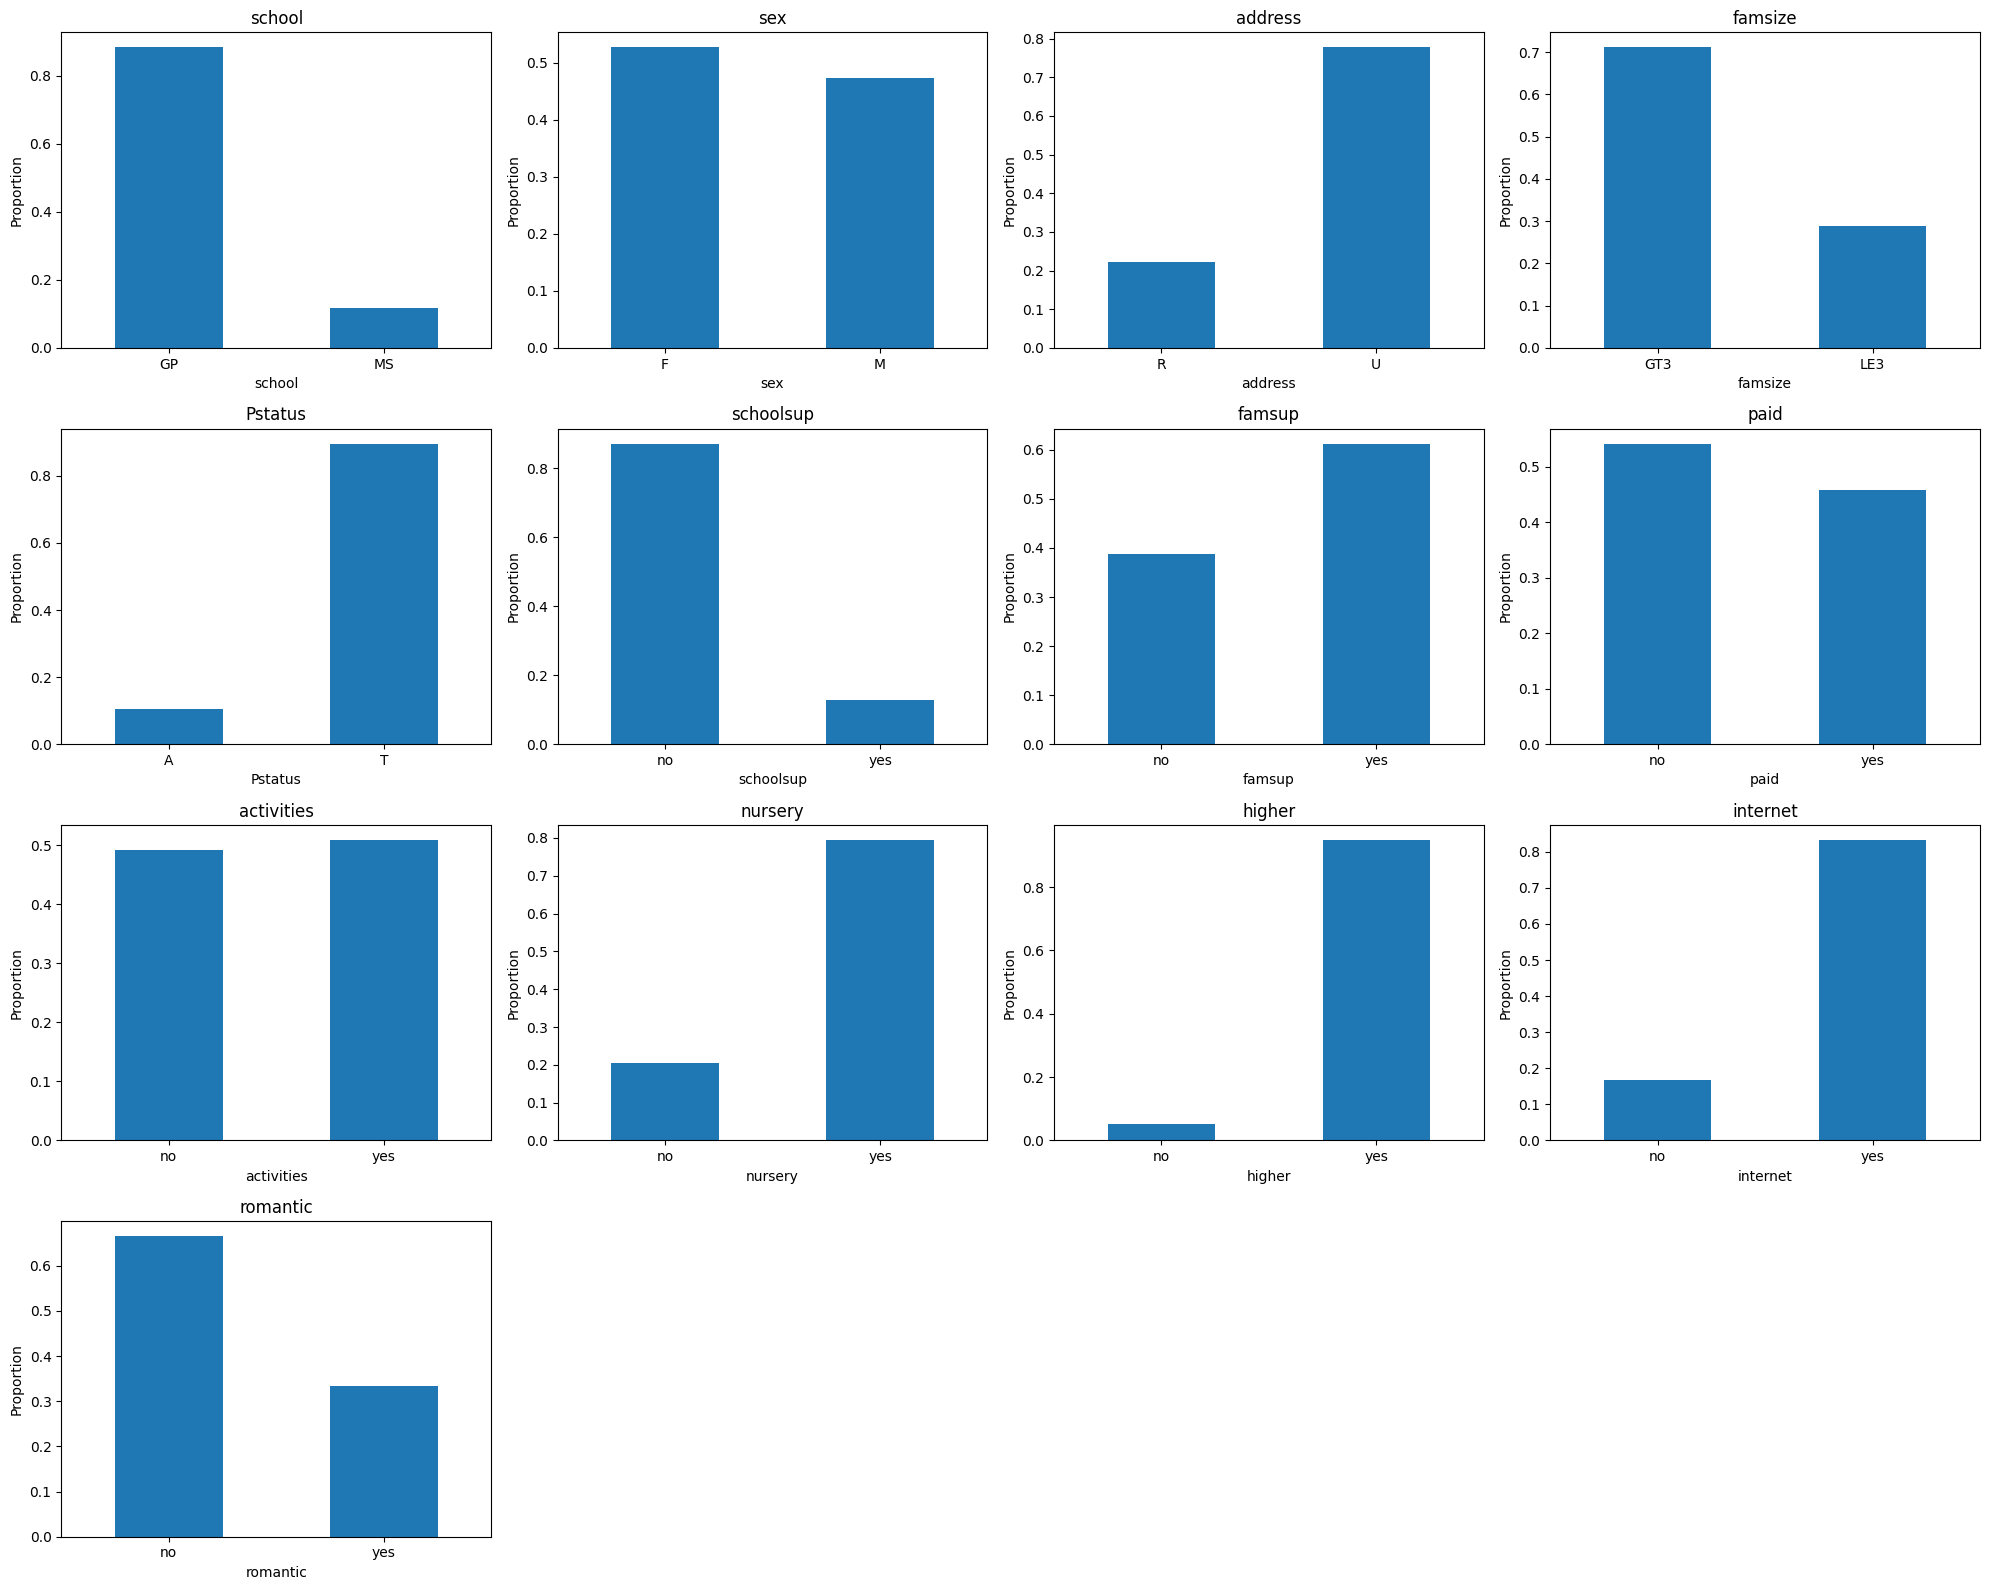

In [7]:
n = len(binary_cats)
cols = min(n, 4)
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(binary_cats):
    df[col].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel('Proportion')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=0)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Categorical variables with more than two categories

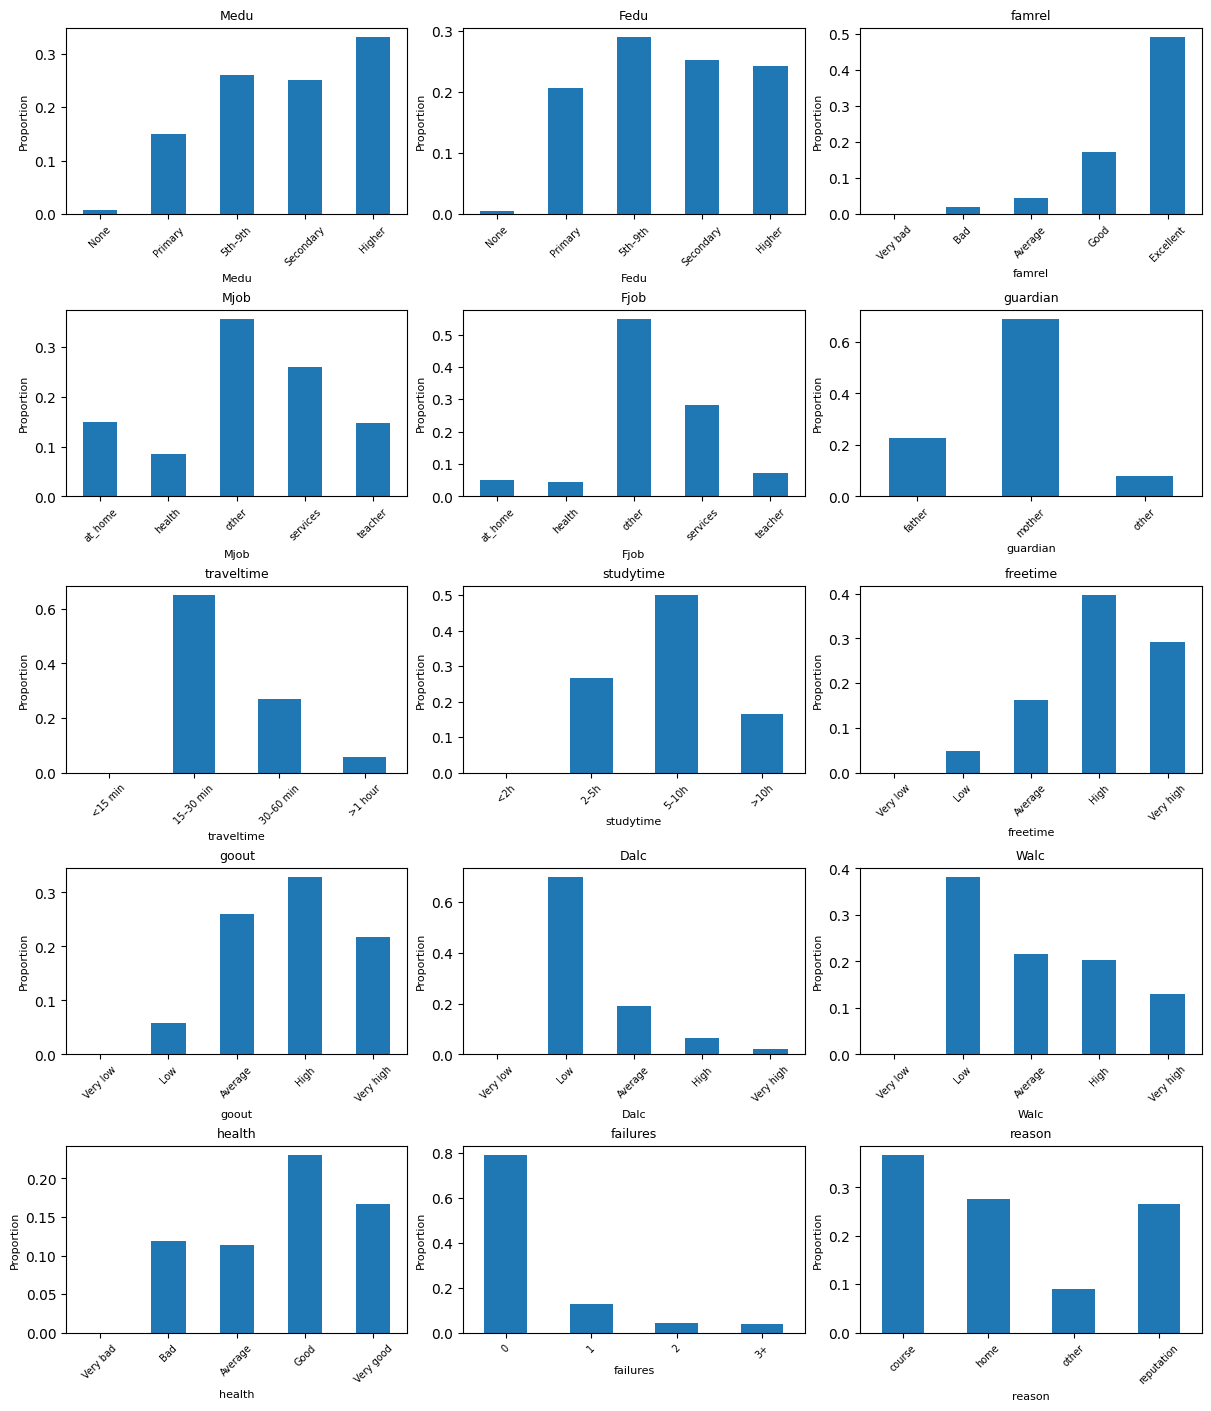

In [8]:
ordinal_labels = {
    'Medu': ['None', 'Primary', '5th–9th', 'Secondary', 'Higher'],
    'Fedu': ['None', 'Primary', '5th–9th', 'Secondary', 'Higher'],
    'famrel': ['Very bad', 'Bad', 'Average', 'Good', 'Excellent'],
    'Mjob': None,
    'Fjob': None,
    'guardian': None,
    'traveltime': ['<15 min', '15–30 min', '30–60 min', '>1 hour'],
    'studytime': ['<2h', '2–5h', '5–10h', '>10h'],
    'freetime': ['Very low', 'Low', 'Average', 'High', 'Very high'],
    'goout': ['Very low', 'Low', 'Average', 'High', 'Very high'],
    'Dalc': ['Very low', 'Low', 'Average', 'High', 'Very high'],
    'Walc': ['Very low', 'Low', 'Average', 'High', 'Very high'],
    'health': ['Very bad', 'Bad', 'Average', 'Good', 'Very good'],
    'failures': ['0', '1', '2', '3+'],
    'reason': None
}

df['failures_mod'] = df['failures'].apply(lambda x: 3 if x > 2 else x)
other_vars = list(ordinal_labels.keys())
n = len(other_vars)

cols = 3
rows = math.ceil(n / cols)
fig_width = 12  # Max width to avoid horizontal scroll
fig_height = 2.8 * rows

fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(other_vars):
    col_plot = 'failures_mod' if col == 'failures' else col
    data = df[col_plot]
    counts = data.value_counts(normalize=True).sort_index()

    if ordinal_labels[col]:
        labels = ordinal_labels[col]
        index_order = [0, 1, 2, 3] if col == 'failures' else range(len(labels))
        counts = counts.reindex(index_order, fill_value=0)
        counts.plot(kind='bar', ax=axes[i])
        axes[i].set_xticks(range(len(labels)))
        axes[i].set_xticklabels(labels, rotation=45, fontsize=7)
    else:
        data.value_counts(normalize=True).sort_index().plot(kind='bar', ax=axes[i])
        axes[i].tick_params(axis='x', rotation=45, labelsize=7)

    axes[i].set_title(f'{col}', fontsize=9)
    axes[i].set_ylabel('Proportion', fontsize=8)
    axes[i].set_xlabel(col, fontsize=8)

plt.show()

* **Parental Education**

  Parents in the dataset are generally well-educated, with higher education more common among mothers than fathers.

* **Family Structure**

  In most families, the mother is the guardian, and family relationships are described as good or excellent.

* **Parental Occupation**

  Mothers are more likely than fathers to work in education, healthcare or stay at home. Both parents are commonly employed in services or broadly defined job categories.

* **Commute Time**

  The majority of students have short travel times, typically between 15 and 30 minutes.

* **Study Time**
  
  Most students dedicate 5–10 hours per week to studying.

* **Free Time**

  Free time after school is generally high, with few students reporting very limited free time.

* **Social Activity**
  
  Most students report moderate to high social activity, with very few going out rarely.

* **Alcohol Consumption**

  Daily alcohol consumption is very low for nearly all students. In contrast, weekend drinking is noticeably higher, with more students reporting moderate to high use.

* **Health**

  Most students consider their health to be good or better.

* **Academic Failures**

  The majority of students have never failed a course. Only a small portion report one or more failures.

* **Reason for School Choice**
  
  The most common reason for school choice is the course offering, followed by proximity to home and school reputation.

### Quantitative Variables

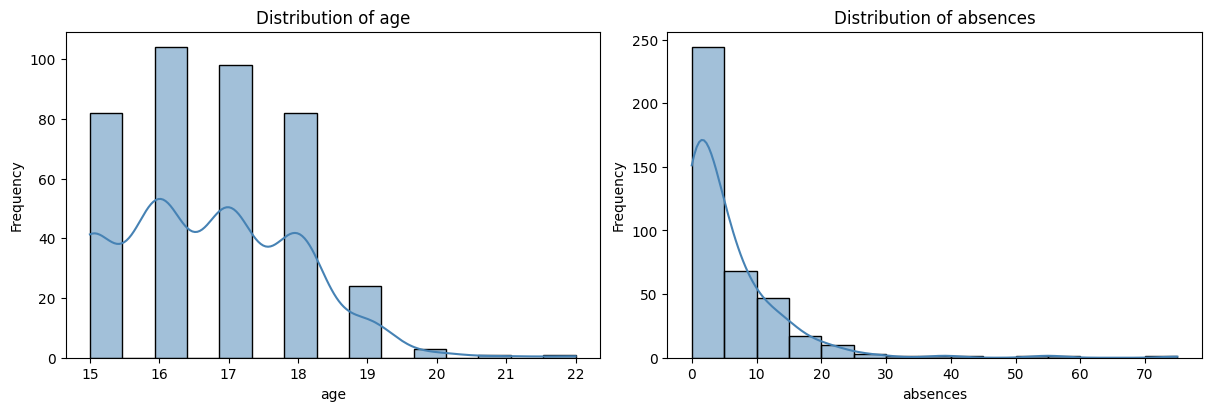

In [9]:
selected_vars = ['age', 'absences']

fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

for i, col in enumerate(selected_vars):
    sns.histplot(df[col], bins=15, kde=True, ax=axes[i], color='steelblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.show()







* **Age**

  Most students are between 16 and 18.

* **Absences**

  Most students have fewer than 10 absences, but some have up to 75, indicating outliers.

### Distrubution of Term Grades



In [10]:
grade_df = df[['G1', 'G2', 'G3']].melt(var_name='Term', value_name='Grade')

fig = px.box(grade_df, x='Term', y='Grade', points='outliers',
             title='Distribution of Term Grades (G1, G2, G3)',
             labels={'Grade': 'Grade', 'Term': 'Term'},
             template='simple_white')
fig.update_layout(showlegend=False)
fig.show()

* Median grades remain stable across terms, suggesting consistent performance throughout the year. However, grade variability increases in Term 3.

### Column for Final Grade (the average of G1, G2, and G3)

To summarize overall student performance, let's add a new column for final grade calculated as the average of G1, G2, and G3.

In [11]:
df['finalgrade'] = (df['G1'] + df['G2'] + df['G3']) / 3

In [12]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,failures_mod,finalgrade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,0,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,0,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,3,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,0,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,0,8.666667


### Distribution of Final Grades

In [13]:
fig = px.histogram(
    df,
    x='finalgrade',
    nbins=21,
    title='Distribution of Final Grades (Average of G1, G2, G3)',
    labels={'finalgrade': 'Final Grade'},
    color_discrete_sequence=['steelblue']
)
fig.update_traces(marker_line_color='black', marker_line_width=1)

fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(0, 21, 2)),  # 0, 2, 4, ..., 20
        ticktext=[str(i) for i in range(0, 21, 2)]
    ),
    yaxis_title='Number of Students',
    xaxis_title='Final Grade',
    template='simple_white',
    title_font=dict(size=20, family='Arial', color='black'),
    font=dict(size=14, family='Arial'),
    xaxis_tickangle=0
)

fig.show()

* The final grades are moderately distributed, with most students scoring between 8 and 15.


* The peak performance centers around 9, indicating an overall average achievement level.

* Very few students fail (i.e., average < 5) and very few get near-perfect scores (above 18).

### Distribution of Students by School

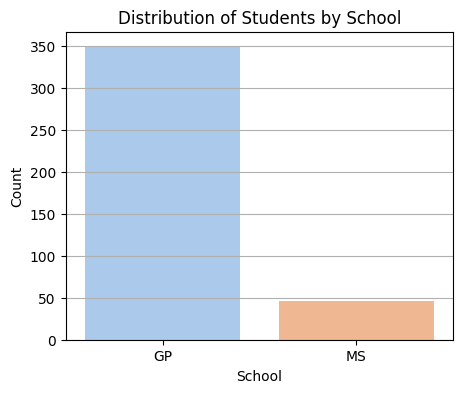

In [14]:
plt.figure(figsize=(5, 4))
sns.countplot(x='school', hue='school', data=df, palette='pastel', legend=False)
plt.title('Distribution of Students by School')
plt.xlabel('School')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [15]:
school_counts = df['school'].value_counts()
school_counts

,count
school,
GP,349
MS,46


* The data collected includes significantly more students from Gabriel Pereira (GP) than from Mousinho da Silveira (MS), with 349 and 46 students respectively.

### Final Grade Distribution by School

In [16]:
fig = px.box(
    df,
    x='school',
    y='finalgrade',
    color='school',
    title='Final Grade Distribution by School',
    labels={'finalgrade': 'Final Grade', 'school': 'School'},
    color_discrete_sequence=['royalblue', 'lightsalmon'],
    width=800,
    height=500
)

fig.update_layout(showlegend=False)
fig.show()

* Students from both schools perform similarly overall, with little difference in median final grades.

* GP shows slightly more variation, suggesting a wider spread of both high- and low-performing students.

### Comparing Binary Features by School

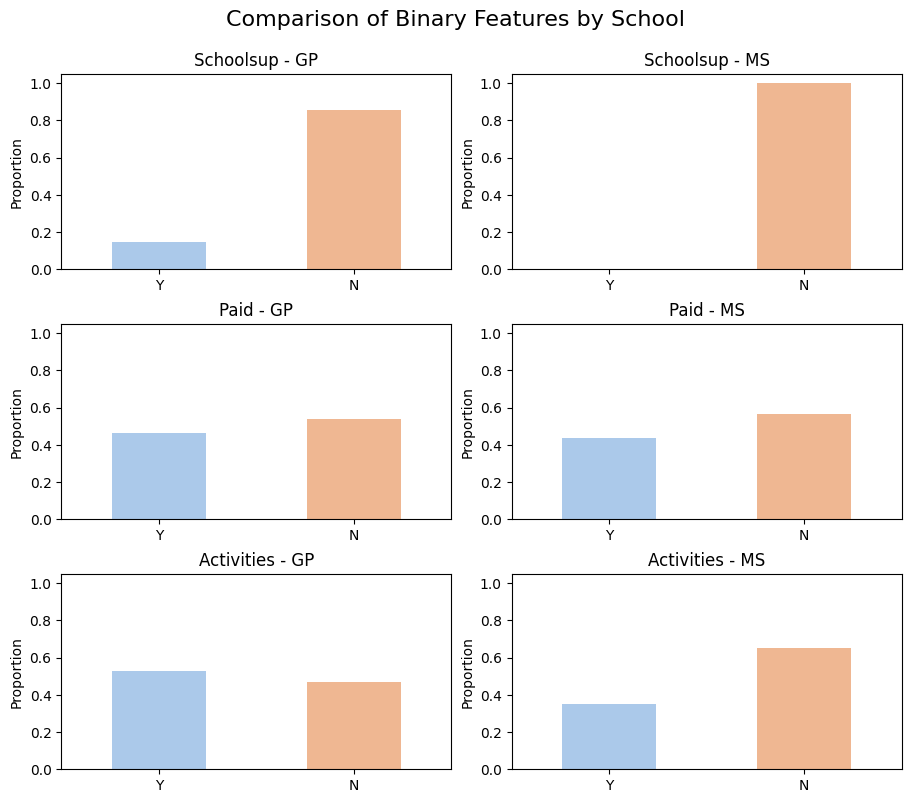

In [17]:
selected_binary_columns = ['schoolsup', 'paid', 'activities']

df_plot = df.copy()
for col in selected_binary_columns:
    if df_plot[col].dtype == 'object':
        df_plot[col] = df_plot[col].replace({'yes': 'Y', 'no': 'N',})

plot_orders = {
    'schoolsup': ['Y', 'N'],
    'paid': ['Y', 'N'],
    'activities': ['Y', 'N']
}

n_rows = len(selected_binary_columns)
schools = df['school'].unique()
n_cols = len(schools)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(9, 2.5 * n_rows), constrained_layout=True)

for i, var in enumerate(selected_binary_columns):
    for j, school in enumerate(schools):
        subset = df_plot[df_plot['school'] == school]
        prop_data = subset[var].value_counts(normalize=True).reindex(plot_orders[var], fill_value=0).reset_index()
        prop_data.columns = [var, 'proportion']

        ax = axes[i][j] if n_rows > 1 else axes[j]
        bars = sns.barplot(data=prop_data, x=var, y='proportion', ax=ax, palette='pastel', hue=var, legend=False)
        ax.set_title(f'{var.capitalize()} - {school}')
        ax.set_xlabel('')
        ax.set_ylabel('Proportion')
        ax.set_ylim(0, 1.05)

        for patch in bars.patches:
            width = patch.get_width()
            patch.set_width(width * 0.6)
            patch.set_x(patch.get_x() + width * 0.2)

fig.suptitle('Comparison of Binary Features by School', fontsize=16, y=1.05)
plt.show()

* At GP, around 15–20% of students receive extra educational support, while at MS, no students report receiving such support.

* Students at GP are also slightly more engaged in paid extra classes and extracurricular activities compared to those at MS.

### Comparing Other Features by School

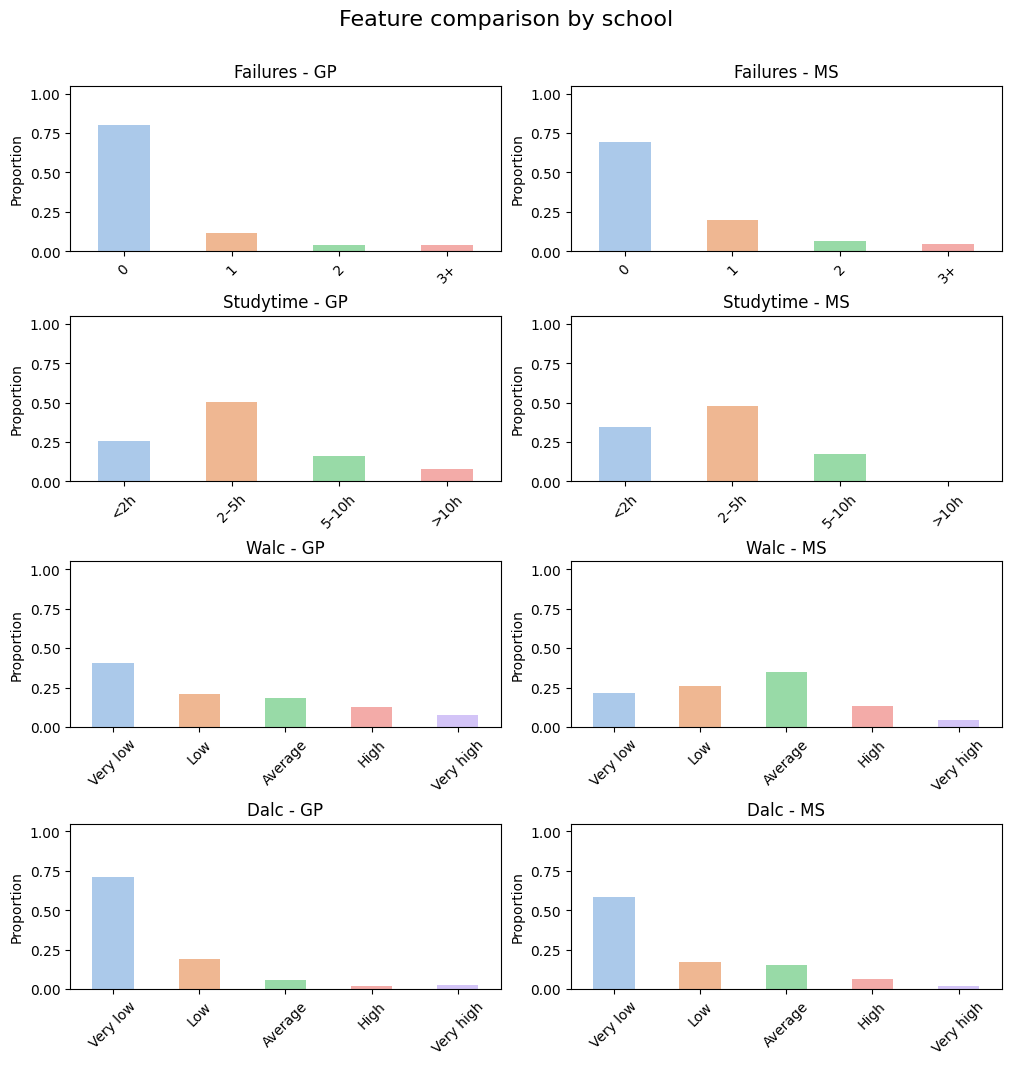

In [18]:
selected_schoolwise_categoricals = ['failures', 'studytime', 'Walc', 'Dalc']

ordinal_labels = {
    'failures': ['0', '1', '2', '3+'],
    'studytime': ['<2h', '2–5h', '5–10h', '>10h'],
    'Walc': ['Very low', 'Low', 'Average', 'High', 'Very high'],
    'Dalc': ['Very low', 'Low', 'Average', 'High', 'Very high']
}

df_plot = df.copy()
df_plot['failures'] = df_plot['failures'].replace({0: '0', 1: '1', 2: '2', 3: '3+'})
df_plot['studytime'] = df_plot['studytime'].replace({1: '<2h', 2: '2–5h', 3: '5–10h', 4: '>10h'})
df_plot['Walc'] = df_plot['Walc'].replace({1: 'Very low', 2: 'Low', 3: 'Average', 4: 'High', 5: 'Very high'})
df_plot['Dalc'] = df_plot['Dalc'].replace({1: 'Very low', 2: 'Low', 3: 'Average', 4: 'High', 5: 'Very high'})

schools = df_plot['school'].unique()
n_rows = len(selected_schoolwise_categoricals)
n_cols = len(schools)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 2.5 * n_rows), constrained_layout=True)
axes = np.array(axes).reshape((n_rows, n_cols))

for i, var in enumerate(selected_schoolwise_categoricals):
    for j, school in enumerate(schools):
        subset = df_plot[df_plot['school'] == school]
        label_order = ordinal_labels[var]
        prop_data = subset[var].value_counts(normalize=True).reindex(label_order, fill_value=0).reset_index()
        prop_data.columns = [var, 'proportion']

        ax = axes[i, j]
        sns.barplot(data=prop_data, x=var, y='proportion', ax=ax, palette='pastel', hue=var)
        ax.set_title(f'{var.capitalize()} - {school}')
        ax.set_xlabel('')
        ax.set_ylabel('Proportion')
        ax.set_ylim(0, 1.05)
        ax.tick_params(axis='x', labelrotation=45)

        for patch in ax.patches:
            width = patch.get_width()
            patch.set_width(width * 0.6)
            patch.set_x(patch.get_x() + width * 0.2)

fig.suptitle('Feature comparison by school', fontsize=16, y=1.05)
plt.show()

* **Failures**: Most students at both schools have never failed a course. However, MS has a slightly higher share of students with past failures compared to GP.

* **Study Time**: Study patterns are similar across both schools. The majority of students report studying between 2 to 5 hours per week, and very few dedicate more than 10 hours.

* **Alcohol Consumption**: Daily alcohol use remains low across both groups. Weekend drinking is more varied, and MS students appear to consume slightly more alcohol on weekends than their GP peers.

### Study Time vs. Final Grade

In [19]:
studytime_labels = {
    1: '<2 hrs',
    2: '2–5 hrs',
    3: '5–10 hrs',
    4: '>10 hrs'
}

fig = px.box(
    df,
    x='studytime',
    y='finalgrade',
    title='Final Grade by Weekly Study Time',
    labels={'studytime': 'Weekly Study Time', 'finalgrade': 'Final Grade'},
    color='studytime',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(
    showlegend=False,
    xaxis=dict(
        tickmode='array',
        tickvals=[1, 2, 3, 4],
        ticktext=['<2 hrs', '2–5 hrs', '5–10 hrs', '>10 hrs']
    ),
    template='simple_white',
    title_font=dict(size=20),
    font=dict(size=14)
)

fig.show()

* **Median grades improve** as study time increases, with the highest median found in the **>10 hrs** group.
  
* The **interquartile range (middle 50%)** shifts upward, indicating that more study time helps not only top performers but also **average and lower-tier students**.

### Absences vs. Final Grade

In [20]:
fig = px.scatter(
    df,
    x='absences',
    y='finalgrade',
    trendline='ols',
    title='Absences vs Final Grade',
    labels={'absences': 'Number of Absences', 'finalgrade': 'Final Grade'},
    opacity=0.7,
    color_discrete_sequence=['steelblue']
)

fig.update_layout(
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    template='simple_white',
    title_font=dict(size=20),
    font=dict(size=14)
)

fig.show()

* Most students with fewer absences perform well.
* The **flat trend line** suggests **absences alone are not a strong predictor of academic success**, but extreme cases likely affect learning outcomes.

### Workday Alcohol Consumption vs. Final Grade

In [21]:
fig = px.box(
    df,
    x='Dalc',
    y='finalgrade',
    title='Workday Alcohol Consumption vs Final Grade',
    labels={'Dalc': 'Workday Alcohol Level (1 = Low, 5 = High)', 'finalgrade': 'Final Grade'},
    color='Dalc',
    color_discrete_sequence=px.colors.sequential.Plasma
)

fig.update_layout(
    showlegend=False,
    xaxis=dict(
        tickmode='array',
        tickvals=[1, 2, 3, 4, 5],
        ticktext=['Very Low', 'Low', 'Moderate', 'High', 'Very High']
    ),
    template='simple_white',
    title_font=dict(size=20),
    font=dict(size=14)
)

fig.show()

* There is a noticeable decline in median grades as workday alcohol consumption increases from “Very Low” to “High”.

* Interestingly, students with "Very High" workday alcohol use show a slightly higher median than "High" but still lower than the “Very Low” group.

* As workday alcohol consumption increases, median final grades drop significantly, and the interquartile range (IQR) narrows. Not only are students who drink more during the week performing worse, but their performance is also consistently low.


### Weekend Alcohol Consumption vs. Final Grade

In [22]:
fig = px.box(
    df,
    x='Walc',
    y='finalgrade',
    title='Weekend Alcohol Consumption vs Final Grade',
    labels={'Walc': 'Weekend Alcohol Level (1 = Low, 5 = High)', 'finalgrade': 'Final Grade'},
    color='Walc',
    color_discrete_sequence=px.colors.sequential.Plasma
)

fig.update_layout(
    showlegend=False,
    xaxis=dict(
        tickmode='array',
        tickvals=[1, 2, 3, 4, 5],
        ticktext=['Very Low', 'Low', 'Moderate', 'High', 'Very High']
    ),
    template='simple_white',
    title_font=dict(size=20),
    font=dict(size=14)
)

fig.show()

* There's no strong, consistent trend, but higher weekend alcohol use seems slightly associated with lower final grades on average.

### Extra Educational Support (schoolsup) vs Final Grade

In [23]:
fig_schoolsup = px.box(
    df,
    x='schoolsup',
    y='finalgrade',
    title='Extra Educational Support vs Final Grade',
    labels={'schoolsup': 'Extra Educational Support', 'finalgrade': 'Final Grade'},
    color='schoolsup',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig_schoolsup.update_layout(
    template='simple_white',
    title_font=dict(size=20),
    font=dict(size=14),
    showlegend=False
)

fig_schoolsup.show()

* Students who receive extra school support generally have lower final grades, with their median performance falling below that of their peers without support. Their scores also tend to cluster in a narrower, lower range. This suggests that such support is primarily offered to students who are already struggling. While it may help stabilize performance, it doesn't fully eliminate the achievement gap.

### Family Educational Support (famsup) vs Final Grade

In [24]:
fig_famsup = px.box(
    df,
    x='famsup',
    y='finalgrade',
    title='Family Educational Support vs Final Grade',
    labels={'famsup': 'Family Educational Support', 'finalgrade': 'Final Grade'},
    color='famsup',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    category_orders={'famsup': ['yes', 'no']}
)

fig_famsup.update_layout(
    template='simple_white',
    title_font=dict(size=20),
    font=dict(size=14),
    showlegend=False
)

fig_famsup.show()

* Family educational support seems to be given to students who are already struggling. Although it’s meant to help, it doesn’t seem to lead to better grades in this dataset.

### Paid Extra Classes vs Final Grade

In [25]:
fig_paid = px.box(
    df,
    x='paid',
    y='finalgrade',
    title='Final Grade vs Paid Extra Classes',
    labels={'paid': 'Paid Extra Classes', 'finalgrade': 'Final Grade'},
    color='paid',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    category_orders={'paid': ['yes', 'no']}
)

fig_paid.update_layout(
    template='simple_white',
    title_font=dict(size=20),
    font=dict(size=14),
    showlegend=False
)

fig_paid.show()

* Students who paid for extra classes tend to have slightly higher final grades. Their performance is a bit more consistent, but the overall improvement is not very large.

### Free Time Level vs Final Grade

In [26]:
fig_freetime = px.box(
    df,
    x='freetime',
    y='finalgrade',
    title='Free Time Level vs Final Grade',
    labels={'freetime': 'Free Time (1 = Very Low, 5 = Very High)', 'finalgrade': 'Final Grade'},
    color='freetime',
    category_orders={'freetime': [1, 2, 3, 4, 5]},
    color_discrete_sequence=px.colors.qualitative.Pastel,
)

fig_freetime.update_layout(
    template='simple_white',
    showlegend=False,
    title_font=dict(size=20),
    font=dict(size=14)
)

fig_freetime.show()

* Students who have more free time tend to do a bit better in their final grades.

* Those with very little free time usually have lower grades on average.

* The difference isn’t huge, but it suggests that having enough time to relax or do other things might help students perform better in school.

### Going Out Level vs Final Grade

In [27]:
fig_goout = px.violin(
    df,
    x='goout',
    y='finalgrade',
    box=True,
    points='all',
    color='goout',
    title='Final Grade Distribution by Going Out Level',
    labels={'goout': 'Going Out (1 = Very Low, 5 = Very High)', 'finalgrade': 'Final Grade'},
    category_orders={'goout': [1, 2, 3, 4, 5]},
    color_discrete_sequence=px.colors.sequential.Blues_r
)

fig_goout.update_layout(
    template='simple_white',
    showlegend=False,
    title_font=dict(size=20),
    font=dict(size=14)
)

fig_goout.show()

* Students who go out less frequently (levels 1–2) tend to have slightly better grades on average.

* As the level of going out increases, the spread of grades gets wider and average performance slightly drops.

* This suggests that more frequent socializing might be linked to more varied academic outcomes.

### Romantic Relationship Status vs Final Grade

In [28]:
fig_romantic = px.box(
    df,
    x='romantic',
    y='finalgrade',
    title='Romantic Relationship Status vs Final Grade',
    labels={'romantic': 'Romantic Relationship (yes/no)', 'finalgrade': 'Final Grade'},
    color='romantic',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig_romantic.update_layout(
    template='simple_white',
    title_font=dict(size=20),
    font=dict(size=14),
    showlegend=False
)

fig_romantic.show()

* Students not in a romantic relationship show a slightly wider range of grades, including more high scores, but the median grade is similar for both groups.

* Relationship status doesn’t strongly affect performance.

### Average Grade Progress over Terms

In [29]:
df['finalgrade'] = (df['G1'] + df['G2'] + df['G3']) / 3
avg_progress = df[['G1', 'G2', 'G3']].mean().reset_index()
avg_progress.columns = ['Term', 'Average Grade']

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=avg_progress['Term'],
    y=avg_progress['Average Grade'],
    mode='lines+markers',
    line=dict(width=3, color='royalblue'),
    marker=dict(size=10),
    name='Average Grade'
))
fig.update_layout(
    title="Average Grade Progression (G1 → G3)",
    xaxis_title="Term",
    yaxis_title="Average Grade",
    yaxis=dict(range=[0, 20]),
    template="simple_white",
    height=400,
    width=600
)
fig.show()

* The average grade slightly decreases from G1 to G3, showing a small drop in performance over time. However, the change is minimal, suggesting overall consistency across terms.

### Absences vs Term Grades

In [30]:
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=['G1 vs Absences', 'G2 vs Absences', 'G3 vs Absences'],
    horizontal_spacing=0.08
)

grades = ['G1', 'G2', 'G3']
colors = ['navy', 'royalblue', 'cornflowerblue']

for i, grade in enumerate(grades):
    fig.add_trace(
        go.Scatter(
            x=df['absences'],
            y=df[grade],
            mode='markers',
            marker=dict(color=colors[i], opacity=0.6),
            name=grade,
        ),
        row=1, col=i+1
    )

    z = np.polyfit(df['absences'], df[grade], 1)
    trend = np.poly1d(z)
    x_vals = np.linspace(df['absences'].min(), df['absences'].max(), 100)
    fig.add_trace(
        go.Scatter(
            x=x_vals,
            y=trend(x_vals),
            mode='lines',
            line=dict(color=colors[i], width=2),
            name=f'{grade} Trend',
        ),
        row=1, col=i+1
    )

    fig.update_xaxes(title_text="Absences", row=1, col=i+1)
    fig.update_yaxes(title_text=f"{grade} Grade", range=[0, 20], row=1, col=i+1)

fig.update_layout(
    height=400,
    width=1100,
    title_text="Absences vs Term Grades (G1, G2, G3)",
    template="simple_white",
    font=dict(size=14)
)

fig.show()

* **G1 & G2**: There’s a small downward trend — students with more absences tend to have slightly lower grades in the first two terms.

* **G3**: The trend shifts upward, suggesting that absences might not have much impact on grades. Other factors could be helping students stay on track.

* Overall, missing classes doesn’t always mean lower grades. It’s possible that many students are making up for lost time and keeping up with their work outside of class.